In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
ls

1533148922_PBL 5 recommendation data.csv
Movie Example/
README.md
Recommender_for_sales_data.ipynb


In [3]:
df = pd.read_csv('1533148922_PBL 5 recommendation data.csv', encoding = "ISO-8859-1")
df.head()

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
def getelbowplot(df_in, y_scale, upperbound):

    sse = []
    silhouette = []
    K = range(1,upperbound)
    for k in K:
        
        km = KMeans(n_clusters=k).fit(df_in)
        sse.append(km.inertia_)
        if k != 1:
            silhouette.append(silhouette_score(df_in, km.labels_))
        else:
            silhouette.append(0)

        
    fig = plt.figure(figsize=(5,10))

    plt.subplot(2, 1, 1)    
    plt.yscale(y_scale)
    plt.plot(K, sse, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion vs Number of Clusters')
    
    plt.subplot(2, 1, 2)
    plt.yscale(y_scale)
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    
    plt.show()

In [5]:
[print(elem) for elem in df]

Customers.id
Customers.fname
Customers.lname
Customers.company
Customers.create_date
Customers.status
Customers.mailing
Customers.reminders
Customers.tax_exempt
Customers.account_id
Customers.sales_rep
Customers.rewards
Customers.profile_id
Customers.last_modified
Customers.customer_type
Orders.id
Orders.customer_id
Orders.fname
Orders.lname
Orders.company
Orders.order_number
Orders.reorder_id
Orders.external_source
Orders.external_id
Orders.currency
Orders.sales_rep
Orders.subtotal
Orders.tax
Orders.shipping
Orders.coupon_id
Orders.coupon_amount
Orders.gift_id
Orders.gift_amount
Orders.fee_name
Orders.fee_amount
Orders.discount_name
Orders.discount_amount
Orders.total
Orders.balance_due
Orders.shipping_carrier
Orders.shipping_method
Orders.shipping_trans
Orders.shipping_flags
Orders.weight
Orders.tracking
Orders.payment_status
Orders.payment_date
Orders.payment_user
Orders.payment_type
Orders.payment_method
Orders.payment_amount
Orders.purchase_order
Orders.payment_id
Orders.payment_c

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [6]:
customer_df = df.loc[:, df.columns.str.startswith('Customers')]
orders_df = df.loc[:, df.columns.str.startswith('Orders')]
orderitems_df = df.loc[:, df.columns.str.startswith('Order_Items')]
products_df = df.loc[:, df.columns.str.startswith('Products')]

### Customers DataFrame

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.company          727 non-null object
Customers.create_date      4194 non-null int64
Customers.status           101 non-null float64
Customers.mailing          2114 non-null float64
Customers.reminders        0 non-null float64
Customers.tax_exempt       5 non-null float64
Customers.account_id       3 non-null float64
Customers.sales_rep        0 non-null float64
Customers.rewards          0 non-null float64
Customers.profile_id       0 non-null float64
Customers.last_modified    4194 non-null int64
Customers.customer_type    3771 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 491.6+ KB


In [8]:
customer_df.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.last_modified       0
Customers.customer_type     423
dtype: int64

In [9]:
for elem in customer_df:
    if customer_df[elem].isnull().sum() > 500:
        customer_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
customer_df.isnull().sum()

Customers.id                 0
Customers.fname              0
Customers.lname              0
Customers.create_date        0
Customers.last_modified      0
Customers.customer_type    423
dtype: int64

In [11]:
customer_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [12]:
customer_df['Customers.last_modified'] = pd.to_datetime(customer_df['Customers.last_modified'], unit='s')
customer_df['Customers.create_date'] = pd.to_datetime(customer_df['Customers.create_date'], unit='s')
customer_df['Customers.last_modified'] = customer_df['Customers.last_modified'].apply(lambda x: x.date())
customer_df['Customers.create_date'] = customer_df['Customers.create_date'].apply(lambda x: x.date())
#customer_df['Customers.days_diff'] = (customer_df['Customers.last_modified'] - customer_df['Customers.create_date']).apply(lambda x: x.days)
customer_df['Customers.days_diff'] = (customer_df['Customers.last_modified']).apply(lambda x: (pd.datetime.now().date() - x).days)


#now - last modified!  when was the last time they bought

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [13]:
customer_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff
0,797,Christy,Dill,2015-03-10,2015-07-24,0.0,1651
1,3,John,Smith,2013-12-03,2015-07-24,0.0,1651
2,3,John,Smith,2013-12-03,2015-07-24,0.0,1651
3,4,James,Anderson,2013-12-11,2015-07-24,0.0,1651
4,5,Abraham,Pollak,2013-12-12,2015-07-24,0.0,1651


In [14]:
customer_df['Customers.customer_type'] = customer_df['Customers.customer_type'].fillna('median')

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
customer_df.isnull().sum()

Customers.id               0
Customers.fname            0
Customers.lname            0
Customers.create_date      0
Customers.last_modified    0
Customers.customer_type    0
Customers.days_diff        0
dtype: int64

In [16]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.create_date      4194 non-null object
Customers.last_modified    4194 non-null object
Customers.customer_type    4194 non-null object
Customers.days_diff        4194 non-null int64
dtypes: int64(2), object(5)
memory usage: 229.5+ KB


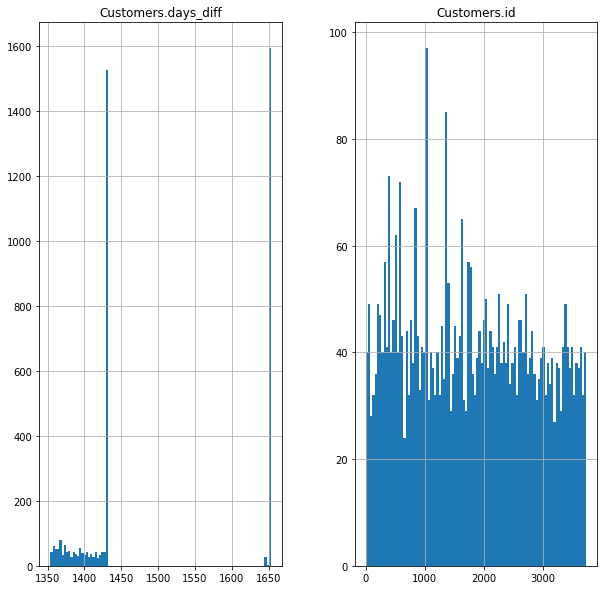

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
customer_df.hist(bins=100, figsize=(10,10))
plt.show()

In [18]:
customer_df[customer_df['Customers.id'] == 3]

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff
1,3,John,Smith,2013-12-03,2015-07-24,0,1651
2,3,John,Smith,2013-12-03,2015-07-24,0,1651


In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.create_date      4194 non-null object
Customers.last_modified    4194 non-null object
Customers.customer_type    4194 non-null object
Customers.days_diff        4194 non-null int64
dtypes: int64(2), object(5)
memory usage: 229.5+ KB


### Orders DataFrame

In [20]:
orders_df.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,...,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,...,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,...,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,...,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,...,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,...,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 53 columns):
Orders.id                  4194 non-null int64
Orders.customer_id         4194 non-null int64
Orders.fname               4194 non-null object
Orders.lname               4194 non-null object
Orders.company             728 non-null object
Orders.order_number        4194 non-null object
Orders.reorder_id          82 non-null float64
Orders.external_source     365 non-null object
Orders.external_id         5 non-null float64
Orders.currency            4194 non-null object
Orders.sales_rep           0 non-null float64
Orders.subtotal            4194 non-null float64
Orders.tax                 3737 non-null float64
Orders.shipping            3999 non-null float64
Orders.coupon_id           882 non-null float64
Orders.coupon_amount       882 non-null float64
Orders.gift_id             0 non-null float64
Orders.gift_amount         0 non-null float64
Orders.fee_name            227 non-null

In [22]:
for elem in orders_df:
    if orders_df[elem].isnull().sum() > 500:
        orders_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
orders_df.isnull().sum()

Orders.id                   0
Orders.customer_id          0
Orders.fname                0
Orders.lname                0
Orders.order_number         0
Orders.currency             0
Orders.subtotal             0
Orders.tax                457
Orders.shipping           195
Orders.total                0
Orders.shipping_method    443
Orders.tracking           376
Orders.payment_status       5
Orders.payment_date        18
Orders.payment_type       384
Orders.payment_amount      18
Orders.payment_id         430
Orders.status               0
Orders.placed_date          0
Orders.updated_date        23
Orders.shipped_date       346
Orders.customer_type      183
dtype: int64

In [24]:
droplist = ['Orders.tax', 'Orders.shipping', 'Orders.shipping_method', 'Orders.tracking', 'Orders.payment_status',
            'Orders.payment_date', 'Orders.payment_type', 'Orders.payment_amount', 'Orders.payment_id',
            'Orders.updated_date', 'Orders.shipped_date', 'Orders.customer_type']
orders_df.drop(droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
orders_df.isnull().sum()

Orders.id              0
Orders.customer_id     0
Orders.fname           0
Orders.lname           0
Orders.order_number    0
Orders.currency        0
Orders.subtotal        0
Orders.total           0
Orders.status          0
Orders.placed_date     0
dtype: int64

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
Orders.id              4194 non-null int64
Orders.customer_id     4194 non-null int64
Orders.fname           4194 non-null object
Orders.lname           4194 non-null object
Orders.order_number    4194 non-null object
Orders.currency        4194 non-null object
Orders.subtotal        4194 non-null float64
Orders.total           4194 non-null float64
Orders.status          4194 non-null int64
Orders.placed_date     4194 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 327.8+ KB


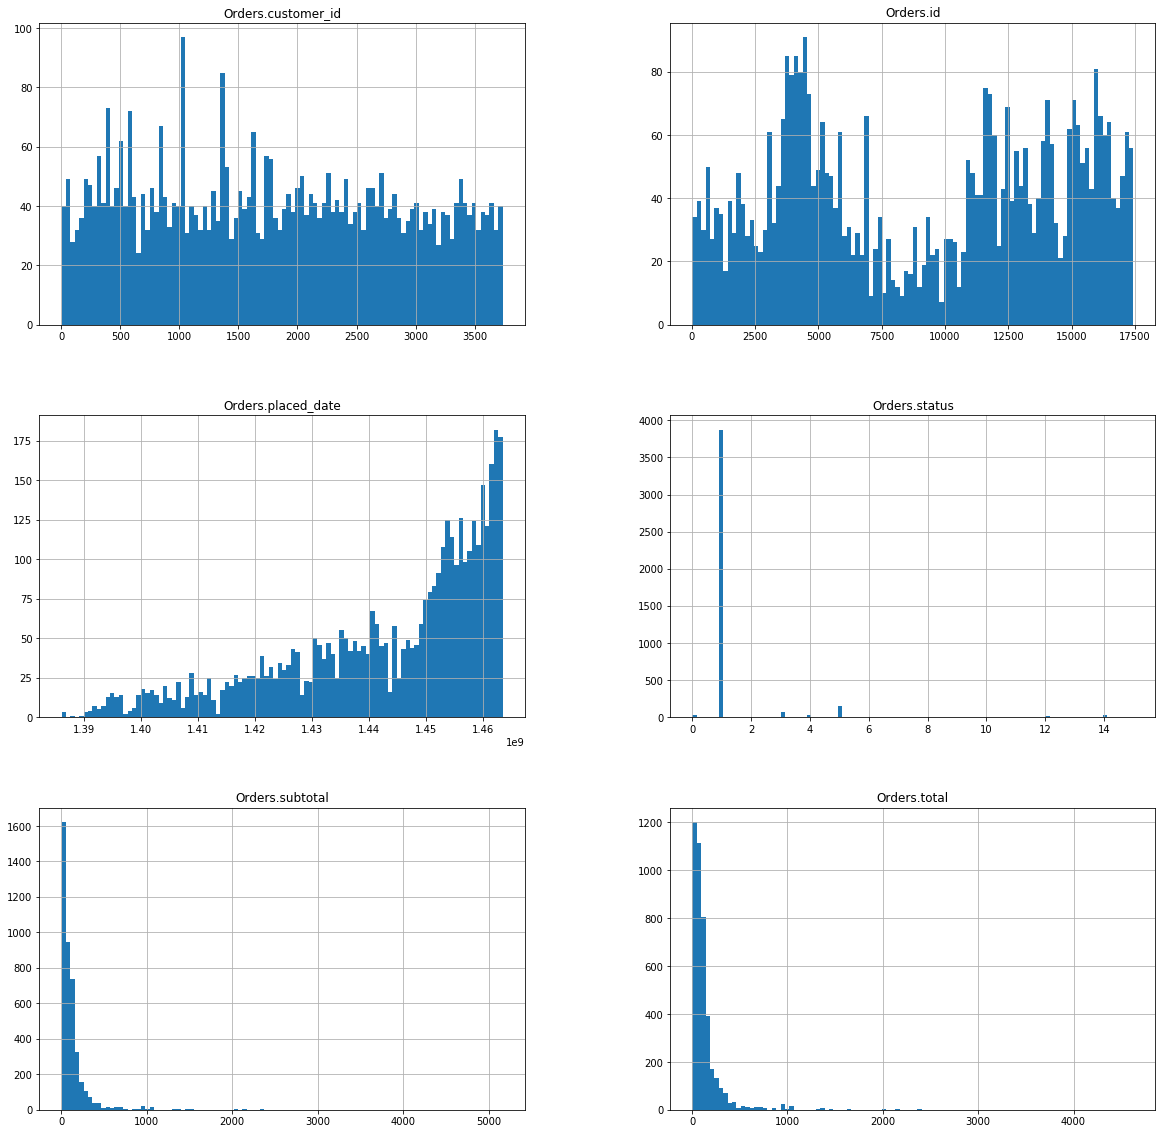

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
orders_df.hist(bins=100, figsize=(20,20))
plt.show()

In [28]:
orders_df['Orders.total'] = orders_df['Orders.total'].apply(lambda x: np.log(x))
orders_df['Orders.subtotal'] = orders_df['Orders.subtotal'].apply(lambda x: np.log(x))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


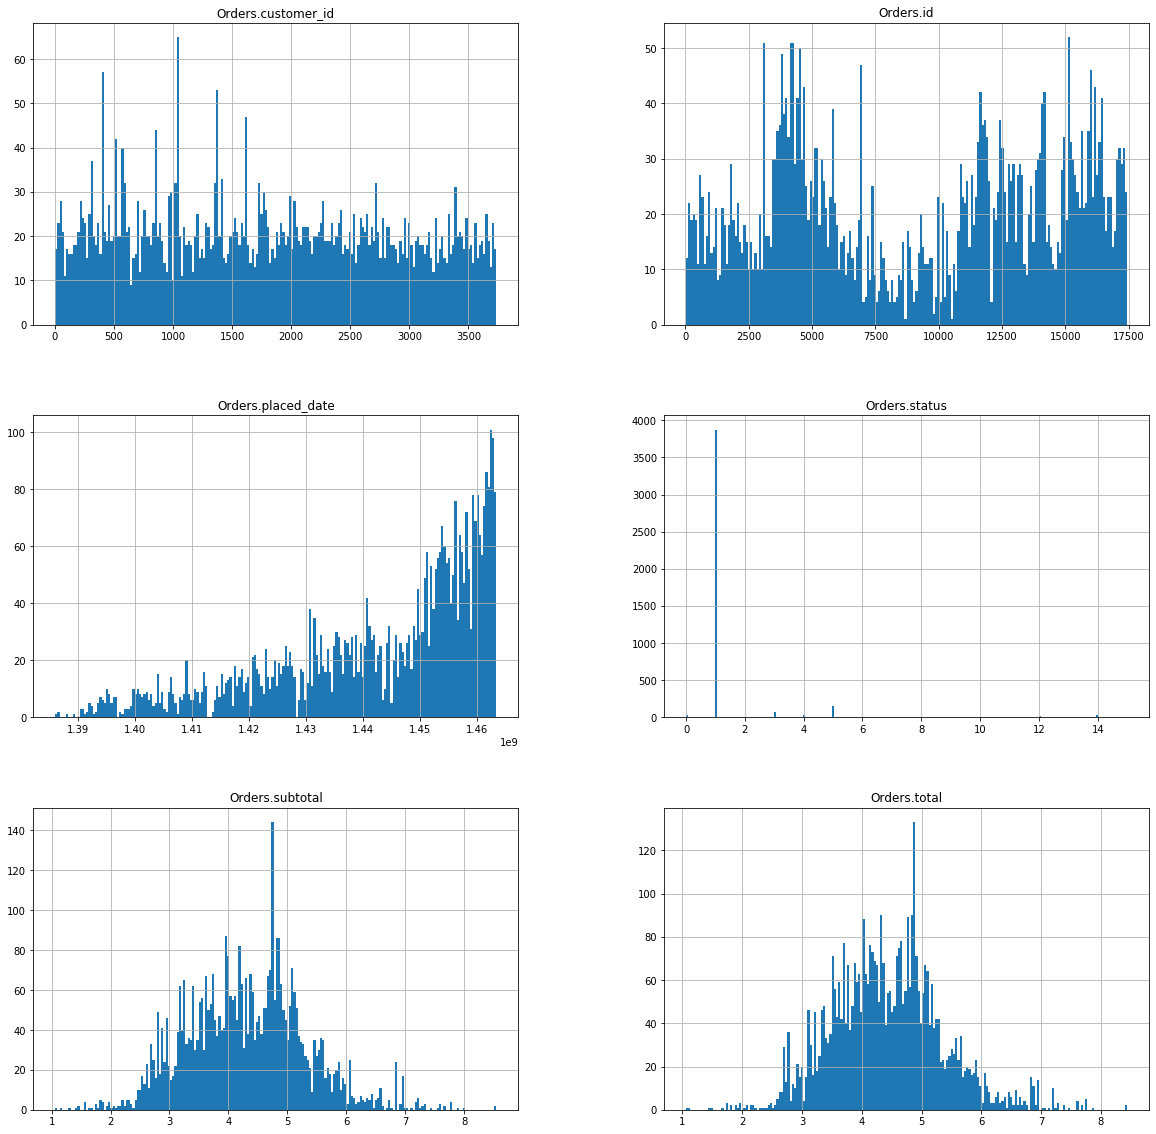

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
orders_df.hist(bins=200, figsize=(20,20))
plt.show()

In [30]:
orders_df[orders_df['Orders.total'] >3000]

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date


### OrderItems DataFrame

In [31]:
orderitems_df.head()

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [32]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Order_Items.id                   4194 non-null int64
Order_Items.parent               4194 non-null int64
Order_Items.product_id           4151 non-null float64
Order_Items.product_name         4194 non-null object
Order_Items.attributes           0 non-null float64
Order_Items.attribute_names      51 non-null object
Order_Items.attribute_prices     0 non-null float64
Order_Items.qty                  4194 non-null int64
Order_Items.price                4194 non-null float64
Order_Items.cost                 4191 non-null float64
Order_Items.registry_item        0 non-null float64
Order_Items.related_id           0 non-null float64
Order_Items.reorder_frequency    24 non-null float64
Order_Items.account_id           0 non-null float64
Order_Items.flags                1008 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 491.6+ KB


In [33]:
orderitems_df.isnull().sum()

Order_Items.id                      0
Order_Items.parent                  0
Order_Items.product_id             43
Order_Items.product_name            0
Order_Items.attributes           4194
Order_Items.attribute_names      4143
Order_Items.attribute_prices     4194
Order_Items.qty                     0
Order_Items.price                   0
Order_Items.cost                    3
Order_Items.registry_item        4194
Order_Items.related_id           4194
Order_Items.reorder_frequency    4170
Order_Items.account_id           4194
Order_Items.flags                3186
dtype: int64

In [34]:
for elem in orderitems_df:
    if orderitems_df[elem].isnull().sum() > 500:
        orderitems_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
orderitems_df.isnull().sum()

Order_Items.id               0
Order_Items.parent           0
Order_Items.product_id      43
Order_Items.product_name     0
Order_Items.qty              0
Order_Items.price            0
Order_Items.cost             3
dtype: int64

In [36]:
orderitems_df.dropna(inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


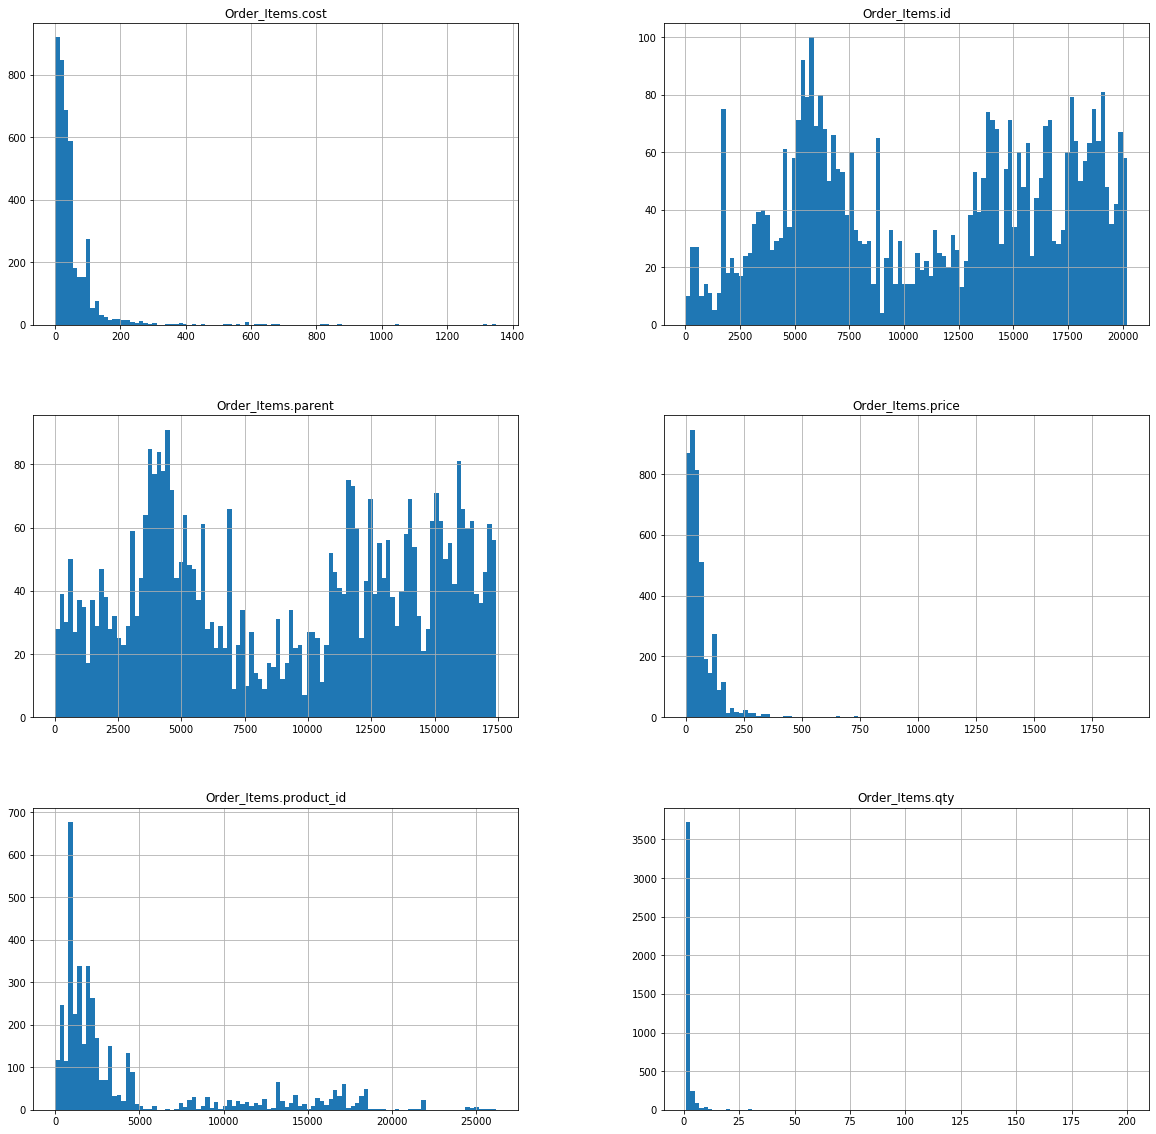

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
orderitems_df.hist(bins=100, figsize=(20,20))
plt.show()

In [38]:
orderitems_df[orderitems_df['Order_Items.price'] > 1000]

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
227,1849,965,2671.0,"Titan Front Wheel Power Wheelchair 20"" Captain...",1,1475.00,1049.0
872,5087,3576,2723.0,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1,1149.00,819.0
1089,5532,3979,2724.0,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1,1199.00,869.0
1188,5726,4153,2679.0,"Cobalt X23 Power Wheelchair, Red",1,1399.00,1050.0
1434,6268,4630,4625.0,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1,1043.75,835.0
2280,11871,9742,2746.0,Cirrus Plus EC Folding Power Wheelchair,1,1899.00,1350.0
2969,15214,12835,3027.0,Battery Powered Electric Patient Lift with Rec...,1,1899.00,1315.0
4191,20191,17426,2707.0,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,1,1099.00,675.0


In [39]:
orderitems_df['Order_Items.price'] = orderitems_df['Order_Items.price'].apply(lambda x: np.log(x))
orderitems_df['Order_Items.cost'] = orderitems_df['Order_Items.cost'].apply(lambda x: np.log(x))
#orderitems_df['Order_Items.qty'] = orderitems_df['Order_Items.qty'].apply(lambda x: np.log(x))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


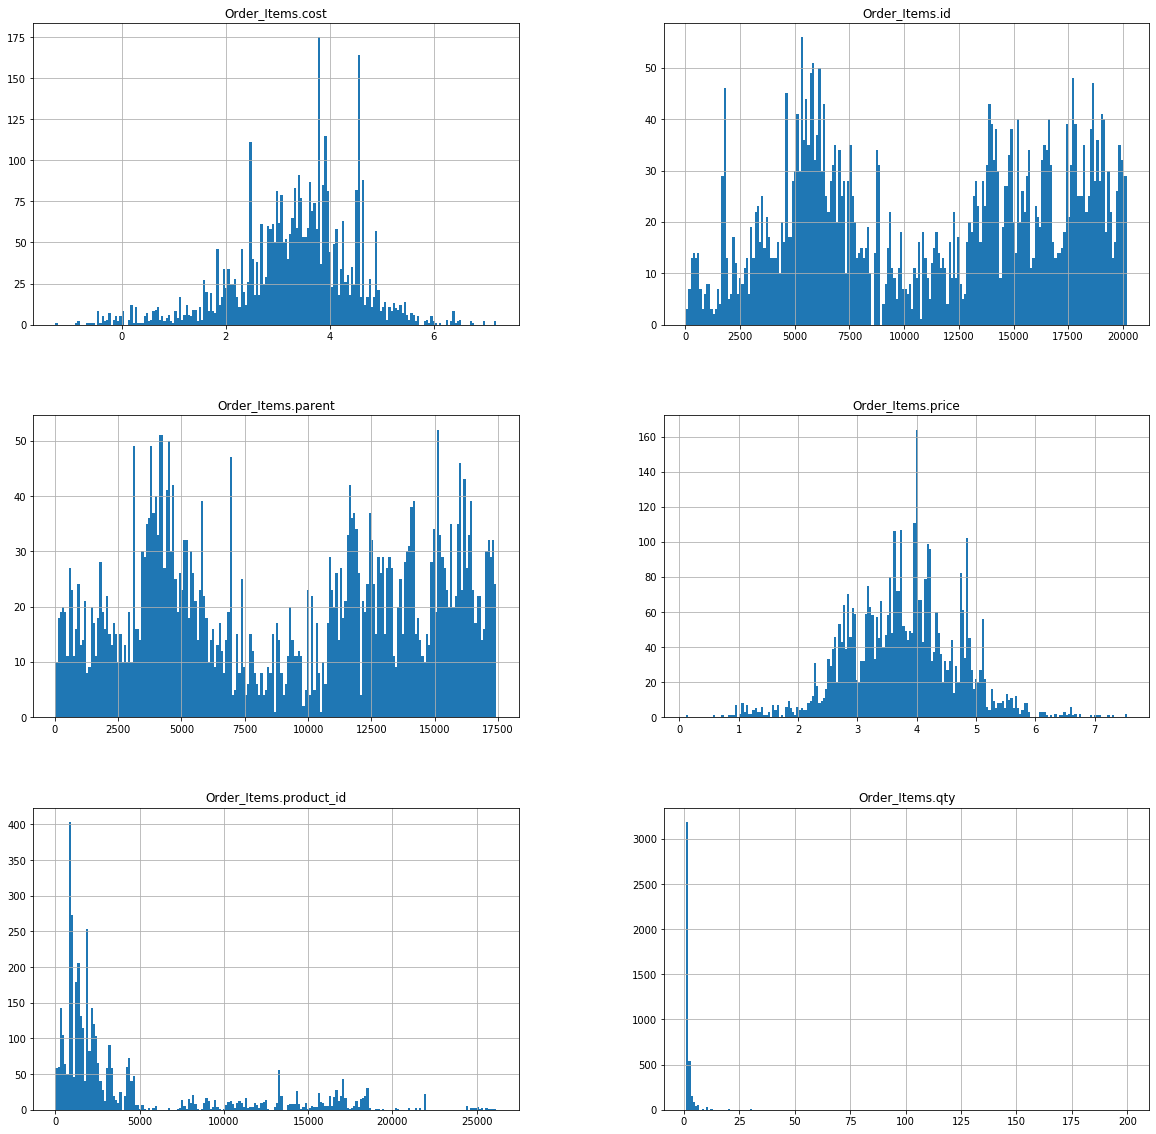

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
orderitems_df.hist(bins=200, figsize=(20,20))
plt.show()

### Products DataFrame

In [41]:
products_df.head()

,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,96.29,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,983.0,0.0,NaN,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,NaN,27.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,991.0,1.0,NaN,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,NaN,50.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 98 columns):
Products.id                       4037 non-null float64
Products.status                   4037 non-null float64
Products.product_type             0 non-null float64
Products.template                 3973 non-null object
Products.vendor                   4037 non-null float64
Products.import_id                4037 non-null float64
Products.name                     4037 non-null object
Products.display_name             3662 non-null object
Products.menu_name                0 non-null float64
Products.list_price               4017 non-null float64
Products.price                    4036 non-null float64
Products.sale_price               1160 non-null float64
Products.cost                     4037 non-null float64
Products.flags                    2987 non-null float64
Products.left_flag                1239 non-null float64
Products.right_flag               0 non-null float64
Products.

In [43]:
products_df.isnull().sum()

Products.id               157
Products.status           157
Products.product_type    4194
Products.template         221
Products.vendor           157
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 98, dtype: int64

In [44]:
for elem in products_df:
    if products_df[elem].isnull().sum() > 500:
        products_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
products_df.isnull().sum()

Products.id                      157
Products.status                  157
Products.template                221
Products.vendor                  157
Products.import_id               157
Products.name                    157
Products.list_price              177
Products.price                   158
Products.cost                    157
Products.last_modified           157
Products.shopping_brand          162
Products.shopping_mpn            160
Products.shopping_flags          277
Products.amazon_item_type        179
Products.google_shopping_id      414
Products.google_shopping_type    215
Products.google_shopping_cat     183
Products.quickbooks_id           466
Products.qb_edit_sequence        466
Products.long_description        186
Products.seo_title               183
Products.seo_url                 157
Products.unit                    209
Products.shipping_length         196
Products.shipping_width          196
Products.shipping_height         196
Products.family_id               325
P

In [46]:
products_droplist = ['Products.import_id', 'Products.shopping_brand', 
                     'Products.shopping_mpn', 'Products.shopping_flags', 'Products.google_shopping_id',
                     'Products.quickbooks_id', 'Products.qb_edit_sequence', 'Products.long_description',
                     'Products.seo_title', 'Products.seo_url', 'Products.unit', 'Products.family_id',
                     'Products.saved_status', 'Products.template', 'Products.amazon_item_type', 
                    ]

In [47]:
products_df.drop(products_droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,24.80,7.50,30.40
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,8.00,7.00,1.50
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,13.23,10.04,10.24
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,10.60,7.80,18.50
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,8.50,2.75,12.00


In [49]:
products_df['Products.google_shopping_type'] = products_df['Products.google_shopping_type'].str.split(">", n = 1, expand = True)
products_df['Products.google_shopping_type'] = products_df['Products.google_shopping_type'].str.split(">", n = 1, expand = True)[0] 
products_df['Products.google_shopping_cat'] = products_df['Products.google_shopping_cat'].str.split(">", n = -1, expand = True)[2]
products_df['Products.shipping_volume'] = products_df['Products.shipping_length']*products_df['Products.shipping_width']*products_df['Products.shipping_height']
products_df.head()

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      4037 non-null float64
Products.status                  4037 non-null float64
Products.vendor                  4037 non-null float64
Products.name                    4037 non-null object
Products.list_price              4017 non-null float64
Products.price                   4036 non-null float64
Products.cost                    4037 non-null float64
Products.last_modified           4037 non-null float64
Products.google_shopping_type    3979 non-null object
Products.google_shopping_cat     362 non-null object
Products.shipping_length         3998 non-null float64
Products.shipping_width          3998 non-null float64
Products.shipping_height         3998 non-null float64
Products.shipping_volume         3998 non-null float64
dtypes: float64(11), object(3)
memory usage: 458.8+ KB


In [51]:
products_df['Products.google_shopping_cat'].unique()

array([None, nan, ' Mobility & Accessibility ',
       ' Biometric Monitor Accessories '], dtype=object)

In [52]:
products_df['Products.google_shopping_cat'].fillna('None', inplace = True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
products_df.isnull().sum()

Products.id                      157
Products.status                  157
Products.vendor                  157
Products.name                    157
Products.list_price              177
Products.price                   158
Products.cost                    157
Products.last_modified           157
Products.google_shopping_type    215
Products.google_shopping_cat       0
Products.shipping_length         196
Products.shipping_width          196
Products.shipping_height         196
Products.shipping_volume         196
dtype: int64

In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      4037 non-null float64
Products.status                  4037 non-null float64
Products.vendor                  4037 non-null float64
Products.name                    4037 non-null object
Products.list_price              4017 non-null float64
Products.price                   4036 non-null float64
Products.cost                    4037 non-null float64
Products.last_modified           4037 non-null float64
Products.google_shopping_type    3979 non-null object
Products.google_shopping_cat     4194 non-null object
Products.shipping_length         3998 non-null float64
Products.shipping_width          3998 non-null float64
Products.shipping_height         3998 non-null float64
Products.shipping_volume         3998 non-null float64
dtypes: float64(11), object(3)
memory usage: 458.8+ KB


In [55]:
products_df.dropna(inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [57]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      3958 non-null float64
Products.status                  3958 non-null float64
Products.vendor                  3958 non-null float64
Products.name                    3958 non-null object
Products.list_price              3958 non-null float64
Products.price                   3958 non-null float64
Products.cost                    3958 non-null float64
Products.last_modified           3958 non-null float64
Products.google_shopping_type    3958 non-null object
Products.google_shopping_cat     3958 non-null object
Products.shipping_length         3958 non-null float64
Products.shipping_width          3958 non-null float64
Products.shipping_height         3958 non-null float64
Products.shipping_volume         3958 non-null float64
dtypes: float64(11), object(3)
memory usage: 463.8+ KB


In [58]:
products_df['Products.last_modified'] = pd.to_datetime(products_df['Products.last_modified'], unit='s')

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,2016-05-13 18:05:23,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,2016-05-04 13:52:35,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,2016-05-13 18:05:23,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,2016-05-07 04:31:15,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,2016-05-04 13:52:35,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [60]:
droplist = ['Products.status', 'Products.vendor', 'Products.last_modified', 'Products.google_shopping_cat', 'Products.shipping_length', 'Products.shipping_width', 'Products.shipping_height']

In [61]:
products_df.drop(droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
products_df.head()

,Products.id,Products.name,Products.list_price,Products.price,Products.cost,Products.google_shopping_type,Products.shipping_volume
0,2310.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,Walking Aids,5654.400000
1,177.0,Urinary Drain Bags,14.41,10.29,1.87,"Incontinence, Urology & Ostomy",84.000000
2,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,Apparel,1360.171008
3,983.0,Basket for 2-Button Walkers,27.38,19.56,12.62,Walking Aids,1529.580000
4,991.0,TENS 3000 Analog Unit,50.47,36.05,25.75,Physical Therapy,280.500000


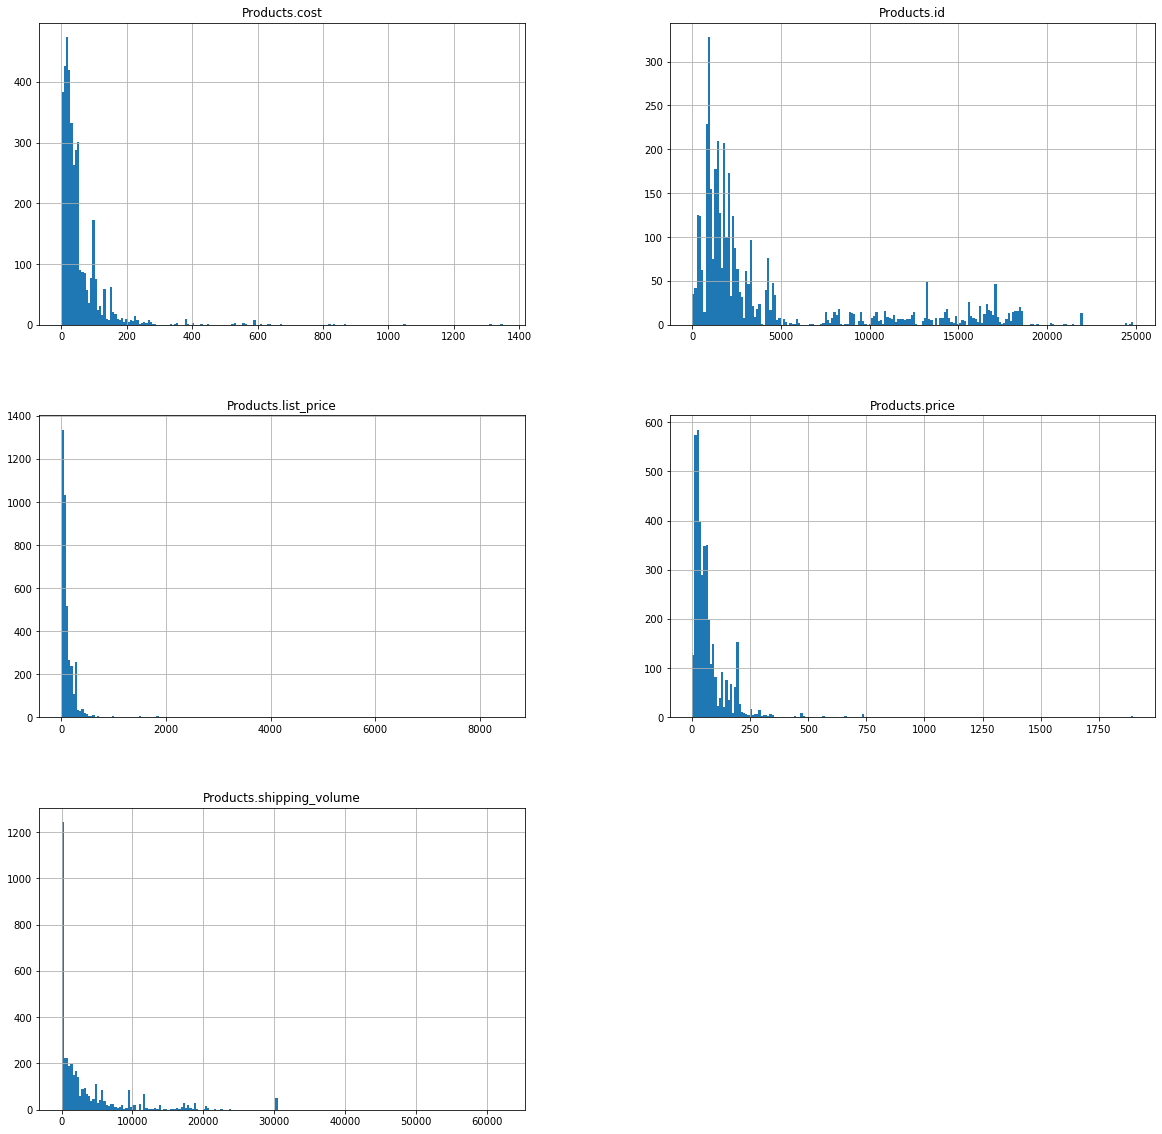

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
products_df.hist(bins=200, figsize=(20,20))
plt.show()

In [64]:
products_df['Products.cost'] = products_df['Products.cost'].apply(lambda x: np.log(x))
products_df['Products.list_price'] = products_df['Products.list_price'].apply(lambda x: np.log(x))
products_df['Products.price'] = products_df['Products.price'].apply(lambda x: np.log(x))
products_df['Products.shipping_volume'] = products_df['Products.shipping_volume'].apply(lambda x: np.log(x+1))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

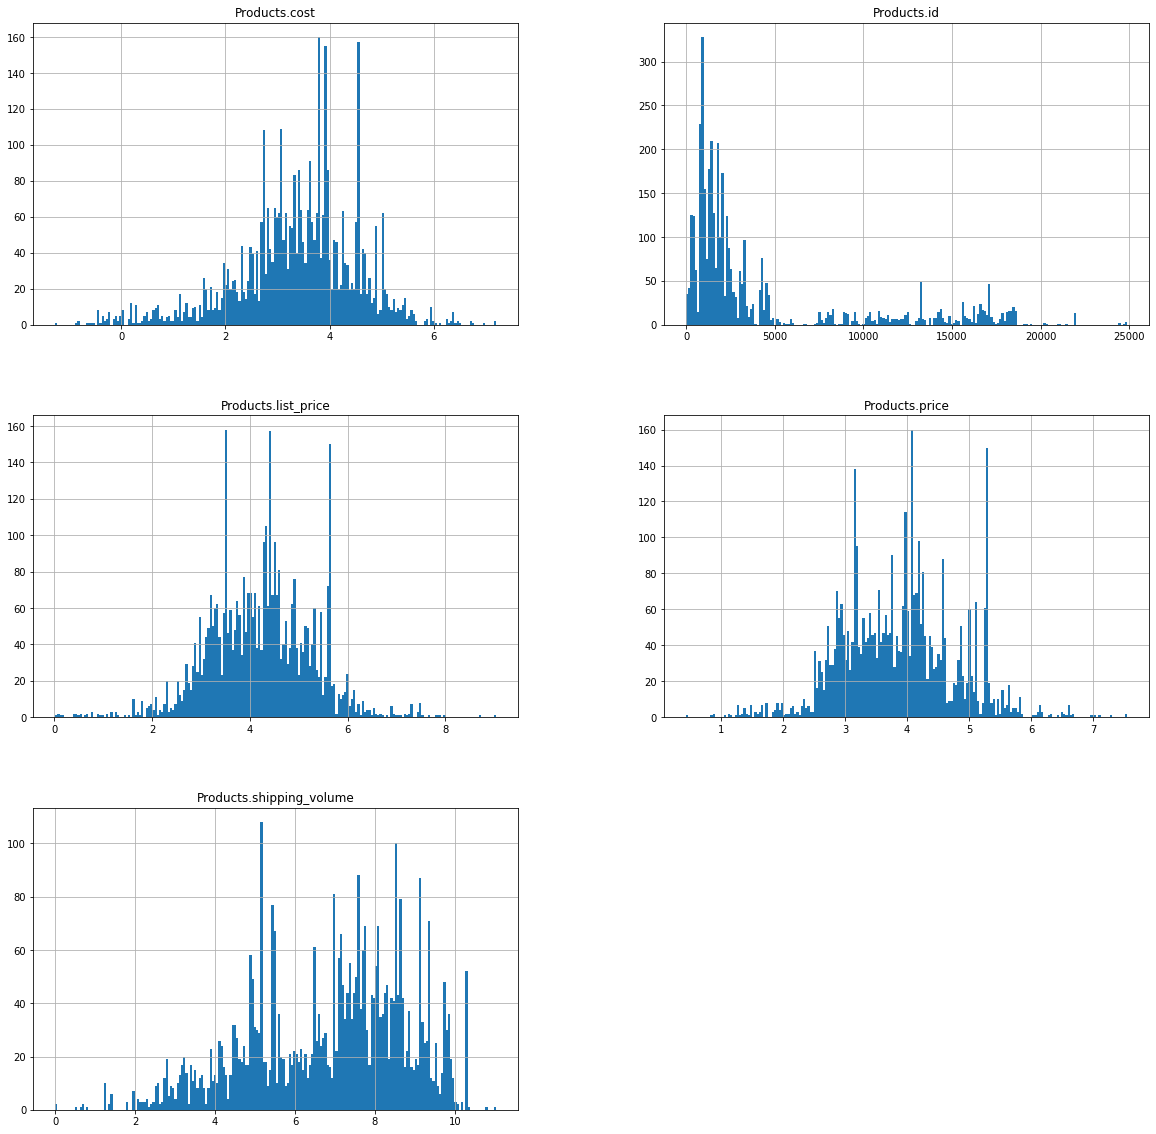

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
products_df.hist(bins=200, figsize=(20,20))
plt.show()

### Combined Dataframe

In [66]:
df = pd.concat([customer_df, products_df, orders_df, orderitems_df], axis=1, join = 'inner')

In [67]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff,Products.id,Products.name,Products.list_price,...,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,Christy,Dill,2015-03-10,2015-07-24,0,1651,2310.0,"Basic Steel Rollators,Green",4.390739,...,4.163404,1,1426019099,5284,3758,2310.0,"Basic Rollators, Green",1,4.046554,3.784190
1,3,John,Smith,2013-12-03,2015-07-24,0,1651,177.0,Urinary Drain Bags,2.667922,...,3.400864,1,1386090455,31,23,177.0,"Urinary Drain Bags,0.000",4,1.609438,0.625938
2,3,John,Smith,2013-12-03,2015-07-24,0,1651,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",4.567364,...,4.366024,3,1449603652,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,4.230913,3.960813
3,4,James,Anderson,2013-12-11,2015-07-24,0,1651,983.0,Basket for 2-Button Walkers,3.309813,...,3.386084,1,1386780263,1816,29,983.0,Basket for 2-Button Walkers,1,2.973487,2.535283
4,5,Abraham,Pollak,2013-12-12,2015-07-24,0,1651,991.0,TENS 3000 Analog Unit,3.921379,...,3.828641,1,1386861599,40,30,991.0,Tens Units,1,3.584907,3.248435


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 31 columns):
Customers.id                     3956 non-null int64
Customers.fname                  3956 non-null object
Customers.lname                  3956 non-null object
Customers.create_date            3956 non-null object
Customers.last_modified          3956 non-null object
Customers.customer_type          3956 non-null object
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.list_price              3956 non-null float64
Products.price                   3956 non-null float64
Products.cost                    3956 non-null float64
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.id                        3956 non-null int64
Orders.customer_id               3956 non-null int64
Orders.fname                

In [69]:
df.isnull().sum().sum()

0

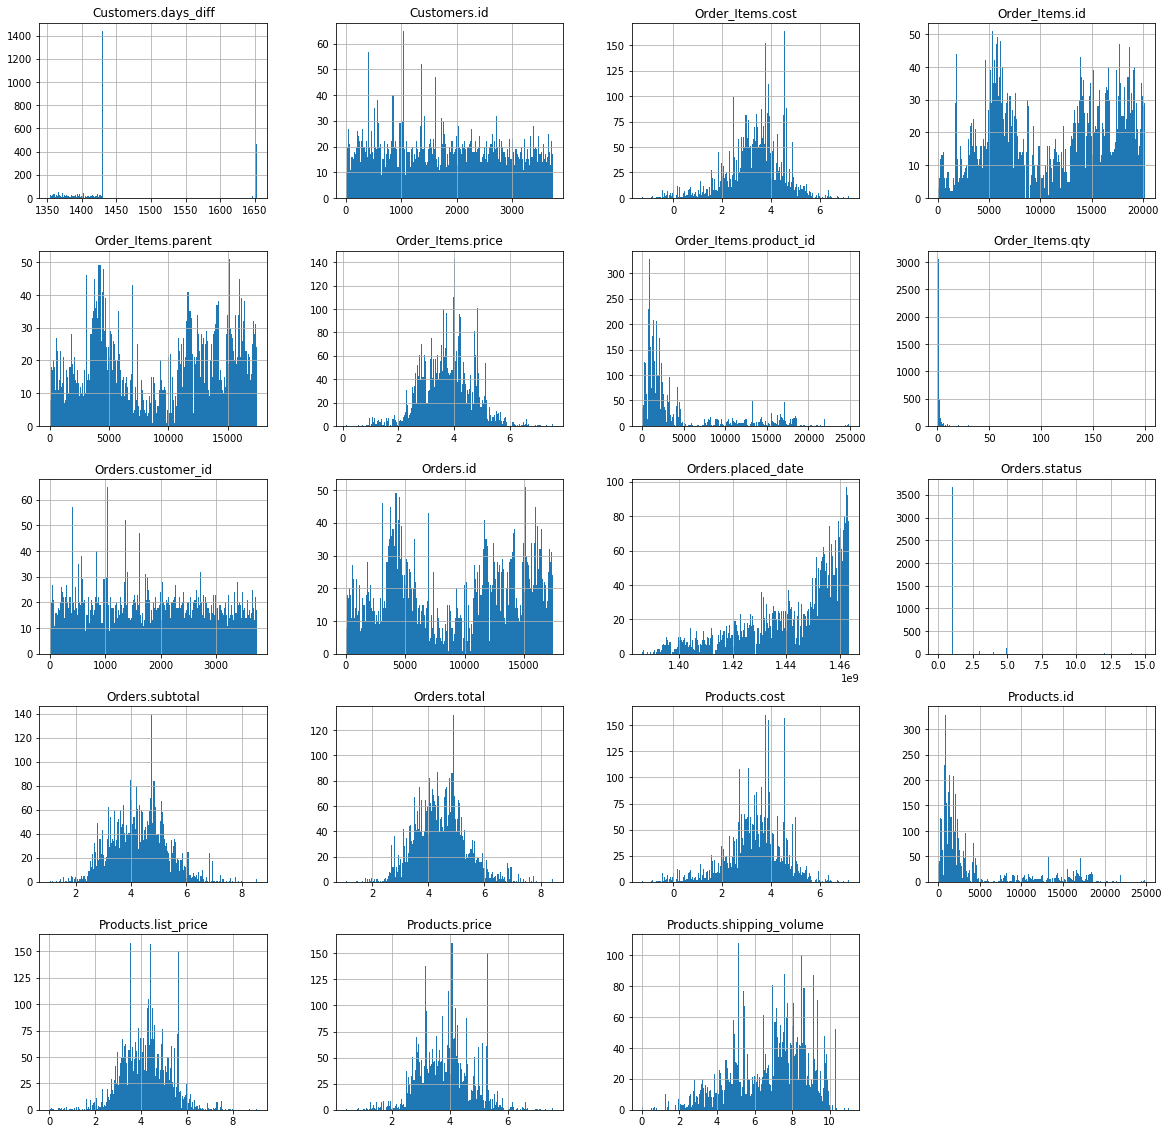

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=200, figsize=(20,20))
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 31 columns):
Customers.id                     3956 non-null int64
Customers.fname                  3956 non-null object
Customers.lname                  3956 non-null object
Customers.create_date            3956 non-null object
Customers.last_modified          3956 non-null object
Customers.customer_type          3956 non-null object
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.list_price              3956 non-null float64
Products.price                   3956 non-null float64
Products.cost                    3956 non-null float64
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.id                        3956 non-null int64
Orders.customer_id               3956 non-null int64
Orders.fname                

In [72]:
dfdroplist = ['Customers.fname', 'Customers.lname', 'Customers.create_date', 'Customers.last_modified', 
              'Customers.customer_type', 'Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 
              'Orders.currency', 'Orders.placed_date', 'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id',
              'Order_Items.product_name', 'Products.list_price', 'Products.price', 'Products.cost', 'Orders.subtotal',
              'Orders.status']
df.drop(dfdroplist, axis=1, inplace = True)

In [73]:
df.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,1651,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,1,4.046554,3.784190
1,3,1651,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,4,1.609438,0.625938
2,3,1651,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,1,4.230913,3.960813
3,4,1651,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,1,2.973487,2.535283
4,5,1651,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,1,3.584907,3.248435


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 11 columns):
Customers.id                     3956 non-null int64
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.order_number              3956 non-null object
Orders.total                     3956 non-null float64
Order_Items.qty                  3956 non-null int64
Order_Items.price                3956 non-null float64
Order_Items.cost                 3956 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 370.9+ KB


In [75]:
df_elbow = (pd.get_dummies(df.drop(['Customers.id', 'Products.id','Orders.order_number'], axis=1), drop_first=True))

In [76]:
df_elbow.head()

,Customers.days_diff,Products.shipping_volume,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost,"Products.name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Products.name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Products.name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","Products.name_100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",...,"Products.google_shopping_type_Incontinence, Urology & Ostomy",Products.google_shopping_type_OR & Surgery Supplies,Products.google_shopping_type_Patient Room And Bedding,Products.google_shopping_type_Pediatric,Products.google_shopping_type_Personal Care,Products.google_shopping_type_Pharmacy,Products.google_shopping_type_Physical Therapy,Products.google_shopping_type_Respiratory,Products.google_shopping_type_Walking Aids,Products.google_shopping_type_Wheelchairs
0,1651,8.640366,4.163404,1,4.046554,3.784190,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1651,4.442651,3.400864,4,1.609438,0.625938,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1651,7.216101,4.366024,1,4.230913,3.960813,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1651,7.333402,3.386084,1,2.973487,2.535283,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1651,5.640132,3.828641,1,3.584907,3.248435,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Elbow Plot

In [77]:
from sklearn.metrics import silhouette_score

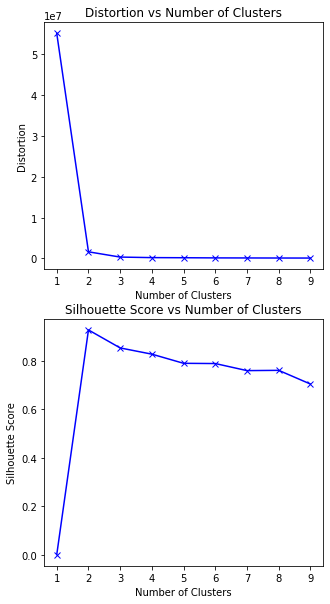

In [78]:
getelbowplot(df_elbow, 'linear', 10)

In [136]:
rfm_df = pd.concat([df[['Customers.id', 'Customers.days_diff', 'Order_Items.qty', 'Orders.total']]], axis=1, join = 'inner')
rfm_df['Orders.total'] = rfm_df['Orders.total'].apply(lambda x: np.exp(x))

In [137]:
rfm_df.head()

,Customers.id,Customers.days_diff,Order_Items.qty,Orders.total
0,797,1651,1,64.29
1,3,1651,4,29.99
2,3,1651,1,78.73
3,4,1651,1,29.55
4,5,1651,1,46.00


### RFM Table

In [143]:
rfmTable = rfm_df.groupby('Customers.id').agg({ 'Customers.days_diff': (lambda x: x.min()),  
                                              'Order_Items.qty': (lambda x: (x).max()),
                                              'Orders.total':(lambda x: x.sum())})

In [144]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 3 to 3736
Data columns (total 3 columns):
Customers.days_diff    2912 non-null int64
Order_Items.qty        2912 non-null int64
Orders.total           2912 non-null float64
dtypes: float64(1), int64(2)
memory usage: 91.0 KB


In [145]:
rfmTable.head()

,Customers.days_diff,Order_Items.qty,Orders.total
Customers.id,,,
3,1651,4,108.72
4,1651,1,29.55
5,1651,1,46.00
7,1651,1,49.14
8,1651,1,69.70


In [84]:
#number 1 selling product and buyer -  by dollar amount and total quantity sold are two ways to go about it.

###  Number 1 Selling Product by Quantity

In [146]:
df.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost,rating
0,797,1651,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,1,4.046554,3.784190,1
1,3,1651,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,4,1.609438,0.625938,1
2,3,1651,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,1,4.230913,3.960813,1
3,4,1651,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,1,2.973487,2.535283,1
4,5,1651,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,1,3.584907,3.248435,1


### Popularity of the Products Sold

In [180]:
df_pop = pd.DataFrame(df.groupby('Products.name').agg({'Order_Items.qty': (lambda x: x.sum()),  
                                                         'Orders.total':(lambda x: x.mean())}))
df_pop.head()

,Order_Items.qty,Orders.total
Products.name,,
"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large",1,5.459798
"1/2"" self-adhesive hook material, 25 yard dispenser box, white",1,4.021953
"1/2"" self-adhesive loop material, 25 yard dispenser box, white",1,4.021953
"100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS",3,4.169873
"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",3,4.737426


In [181]:
df_pop['Total_Sold'] = df_pop['Order_Items.qty']*df_pop['Orders.total']

### Popularity by Total Revenue

In [182]:
df_pop[df_pop2['Total_Sold'] == df_pop['Total_Sold'].max()]

,Order_Items.qty,Orders.total,Total_Sold
Products.name,,,
"Disposable Emergency Blanket,Not Applicable",396,6.392073,2531.260949


### Popularity by Total quanity Sold

In [183]:
df_pop[df_pop['Order_Items.qty'] == df_pop['Order_Items.qty'].max()]

,Order_Items.qty,Orders.total,Total_Sold
Products.name,,,
"Disposable Emergency Blanket,Not Applicable",396,6.392073,2531.260949


### Recommender

In [85]:
ratings = df

In [86]:
ratings.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,1651,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,1,4.046554,3.784190
1,3,1651,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,4,1.609438,0.625938
2,3,1651,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,1,4.230913,3.960813
3,4,1651,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,1,2.973487,2.535283
4,5,1651,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,1,3.584907,3.248435


In [87]:
ratings['Products.id'].nunique(), ratings['Customers.id'].nunique()

(1661, 2912)

In [88]:
ratings['rating'] = 1

In [89]:
ratings.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost,rating
0,797,1651,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,1,4.046554,3.784190,1
1,3,1651,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,4,1.609438,0.625938,1
2,3,1651,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,1,4.230913,3.960813,1
3,4,1651,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,1,2.973487,2.535283,1
4,5,1651,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,1,3.584907,3.248435,1


In [90]:
productiddict = pd.Series(ratings['Products.name'].values, index = ratings['Products.id']).to_dict()
productiddict

# use count vectorizor on these descriptions then feed into sklearn cosine

#co-occurence what two items were bought together

{2310.0: 'Basic Steel Rollators,Green',
 177.0: 'Urinary Drain Bags',
 1.0: 'SensiCare Nitrile Exam Gloves,Blue,XX-Large',
 983.0: 'Basket for 2-Button Walkers',
 991.0: 'TENS 3000 Analog Unit',
 1379.0: 'Aloetouch Sensitive Personal Cleansing Baby Wipes',
 815.0: 'Universal Raised Toilet Seat',
 795.0: 'Multipurpose Sharps Containers,Red,8.000 QT',
 1430.0: 'Protection Plus Disposable Underpads,Blue,36" X 23"',
 1385.0: 'Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes',
 910.0: 'Aluminum Transport Chair with 12" Wheels,Blue,F: 8   R: 12',
 566.0: 'Ultrasound Gel,Blue,8.500 OZ',
 1274.0: 'ReadyBath SELECT Medium Weight Cleansing Washcloths',
 1272.0: 'ReadyBath SELECT Medium Weight Cleansing Washcloths',
 1411.0: 'Protection Plus Disposable Underpads,Blue,24" X 17"',
 1389.0: 'Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes',
 1384.0: 'Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes',
 65.0: 'Comfort-Aire Disposable Briefs,48"-58"',
 1296.0: 'Soothe & C

In [91]:
{k: v for k, v in sorted(productiddict.items(), key=lambda item: item[1])}

{9460.0: '1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large',
 18028.0: '1/2" self-adhesive hook material, 25 yard dispenser box, white',
 18031.0: '1/2" self-adhesive loop material, 25 yard dispenser box, white',
 5182.0: '100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS',
 5145.0: '100% Cotton Unisex Reversible Tops,Ceil Blue,MHS',
 829.0: '18" Hamper Stands,Standard',
 18024.0: '2" self-adhesive loop material, 10 yard dispenser box, tan',
 18018.0: '2" self-adhesive loop material, 25 yard dispenser box, tan',
 1672.0: '2-Ply Tissue/Poly Professional Towels,Not Applicable',
 857.0: '2000 Wheelchairs',
 841.0: '2000 Wheelchairs',
 859.0: '2000 Wheelchairs',
 9053.0: '2000 Wheelchairs',
 844.0: '2000 Wheelchairs',
 836.0: '2000 Wheelchairs',
 851.0: '2000 Wheelchairs',
 850.0: '2000 Wheelchairs',
 265.0: '24 Hour Urine Collection Bottle,3000.0 ML',
 266.0: '24 Hour Urine Collection Bottle,3000.0 ML',
 3227.0: '3 Wheel Walker Rollator with Basket Tray and 

In [92]:
ratings = pd.concat([ratings['Customers.id'], ratings['Products.name']], axis=1)
ratings['rating'] = 1

In [93]:
ratings.head()

,Customers.id,Products.name,rating
0,797,"Basic Steel Rollators,Green",1
1,3,Urinary Drain Bags,1
2,3,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",1
3,4,Basket for 2-Button Walkers,1
4,5,TENS 3000 Analog Unit,1


In [94]:
ratings[ratings['Customers.id'] == 13]

,Customers.id,Products.name,rating
12,13,"Protection Plus Disposable Underpads,Blue,36"" ...",1
13,13,Aloetouch SELECT Premium Spunlace Personal Cle...,1
14,13,Aloetouch SELECT Premium Spunlace Personal Cle...,1


In [95]:
ratings['Customers.id'].nunique()

2912

In [96]:
Ratings = ratings.pivot_table(index=['Customers.id'], columns=['Products.name'], values='rating')  

In [97]:
Ratings.head(15)

Products.name,"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","100% Cotton Unisex Reversible Tops,Ceil Blue,MHS","18"" Hamper Stands,Standard","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels,Not Applicable",2000 Wheelchairs,...,"Wrist and Forearm Splint with Abducted Thumb,Large","Wrist and Forearm Splint with Abducted Thumb,Medium","Wrist and Forearm Splint with Abducted Thumb,Small","Wrist and Forearm Splints,Medium","Youth Two-Button Folding Walkers with 5"" Wheels,5""",Youth-Sized Walker Platform Attachment,"Zip-Style Biohazard Specimen Bags,Clear",iWalker Euro Style Rollator,"sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","sEMG - single use uni-gel electrodes only, case of 100"
Customers.id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
starWarsRatings = Ratings['Multipurpose Sharps Containers,Red,8.000 QT']
starWarsRatings.head(20)

Customers.id
3     NaN
4     NaN
5     NaN
7     NaN
8     NaN
12    1.0
13    NaN
22    NaN
23    NaN
24    NaN
27    NaN
31    NaN
32    NaN
33    NaN
35    NaN
37    NaN
39    NaN
40    NaN
41    NaN
42    NaN
Name: Multipurpose Sharps Containers,Red,8.000 QT, dtype: float64

In [99]:
similarMovies = Ratings.corrwith(starWarsRatings)
similarMovies

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Products.name
1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large                          NaN
1/2" self-adhesive hook material, 25 yard dispenser box, white                         NaN
1/2" self-adhesive loop material, 25 yard dispenser box, white                         NaN
100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS                    NaN
100% Cotton Unisex Reversible Tops,Ceil Blue,MHS                                       NaN
                                                                                        ..
Youth-Sized Walker Platform Attachment                                                 NaN
Zip-Style Biohazard Specimen Bags,Clear                                                NaN
iWalker Euro Style Rollator                                                            NaN
sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel   NaN
sEMG - single use uni-gel electrodes only, case of 100                      

In [184]:
pwd

'/Users/michael/Desktop/devmasters/day16-RecommenderSystems'